In [1]:
from zodi import load_zodi
import astropy.units as ur
import numpy as np

fλ_unit = ur.erg/ur.cm**2/ur.s / ur.Angstrom
fλ_density_unit = fλ_unit / (ur.arcsec *ur.arcsec)

for band in [1800.0, 2200.0], [2600.0, 3000.0],[3400., 3800.]:
    for scale in [75,300, 6000]:
        zodi = load_zodi(scale=scale)
    
        print()
        print(band)
        print(scale)
        midλ = np.mean(band) * ur.AA
        print(midλ*ur.AA)

        ctr = 0
        flux_density = 0
        for ind, wv in enumerate(zodi['wavelength']):
            if ( (wv < band[0]) | (wv > band[1])):
                continue
            ctr += 1
            flux_density += zodi['flux'][ind]

        # Effective flux density in the band:
        flux_density /= float(ctr)
        fden = flux_density.to(fλ_density_unit)

        # Take out the per-arcsec
        fden_perarcsec = fden * (ur.arcsec * ur.arcsec)
        print(fden_perarcsec)

        print('{} per arcsec2'.format((fden_perarcsec).to(ur.ABmag, equivalencies=ur.spectral_density(midλ))))



[1800.0, 2200.0]
75
2000.0 Angstrom2
5.520010522893318e-21 erg / (Angstrom cm2 s)
31.73205201491688 mag(AB) per arcsec2

[1800.0, 2200.0]
300
2000.0 Angstrom2
2.2080042091573273e-20 erg / (Angstrom cm2 s)
30.22690203659698 mag(AB) per arcsec2

[1800.0, 2200.0]
6000
2000.0 Angstrom2
4.416008418314655e-19 erg / (Angstrom cm2 s)
26.974327047437026 mag(AB) per arcsec2

[2600.0, 3000.0]
75
2800.0 Angstrom2
1.5922737219616827e-19 erg / (Angstrom cm2 s)
27.351217281113414 mag(AB) per arcsec2

[2600.0, 3000.0]
300
2800.0 Angstrom2
6.369094887846731e-19 erg / (Angstrom cm2 s)
25.846067302793507 mag(AB) per arcsec2

[2600.0, 3000.0]
6000
2800.0 Angstrom2
1.2738189775693467e-17 erg / (Angstrom cm2 s)
22.593492313633554 mag(AB) per arcsec2

[3400.0, 3800.0]
75
3600.0 Angstrom2
6.913387296009224e-19 erg / (Angstrom cm2 s)
25.211312035366625 mag(AB) per arcsec2

[3400.0, 3800.0]
300
3600.0 Angstrom2
2.7653549184036896e-18 erg / (Angstrom cm2 s)
23.70616205704672 mag(AB) per arcsec2

[3400.0, 3800.0

In [2]:
import matplotlib.pyplot as plt

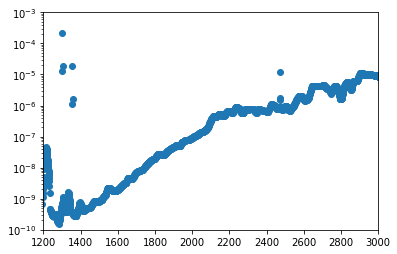

In [10]:
plt.scatter(zodi['wavelength'], zodi['flux'])
plt.yscale('Log')
plt.ylim([1e-10, 1e-3])
plt.xlim([1200, 3000])


plt.show()